# Preliminary data exploration for the Lending Club data set

This workbook is for me to familiarize myself with the data we have

In [1]:
# standard headers copied from HW 4
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression as Lin_Reg
from sklearn.linear_model import Ridge as Ridge_Reg
from sklearn.linear_model import Lasso as Lasso_Reg
from statsmodels.regression.linear_model import OLS
import sklearn.preprocessing as Preprocessing
import itertools as it
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cmx
import matplotlib.colors as colors
import scipy as sp
from itertools import combinations
%matplotlib inline

In [2]:
# Andrew's additional top-level setup
plt.style.use('ggplot')  # looks better and is more informative
from collections import namedtuple  # makes returning complex values less error-prone

In [3]:
# Read in the raw data taken from TODO put url here
raw_lc_data = pd.read_csv('loan.csv',
                         )

C:\Users\agreene\AppData\Local\Continuum\Anaconda2\envs\amg1\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (19,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


TODO: We got the following warning:

```C:\Users\agreene\AppData\Local\Continuum\Anaconda2\envs\amg1\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (19,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
```

so we'll have to pay particular attention to columns 19 and 55.

In [4]:
for date_column in [
    'issue_d', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d', 'earliest_cr_line'
]:
    print date_column
    raw_lc_data[date_column] = pd.to_datetime(raw_lc_data[date_column],
                                              format='%b-%Y')

issue_d
last_pymnt_d
next_pymnt_d
last_credit_pull_d
earliest_cr_line


In [5]:
print raw_lc_data.columns

Index([u'id', u'member_id', u'loan_amnt', u'funded_amnt', u'funded_amnt_inv',
       u'term', u'int_rate', u'installment', u'grade', u'sub_grade',
       u'emp_title', u'emp_length', u'home_ownership', u'annual_inc',
       u'verification_status', u'issue_d', u'loan_status', u'pymnt_plan',
       u'url', u'desc', u'purpose', u'title', u'zip_code', u'addr_state',
       u'dti', u'delinq_2yrs', u'earliest_cr_line', u'inq_last_6mths',
       u'mths_since_last_delinq', u'mths_since_last_record', u'open_acc',
       u'pub_rec', u'revol_bal', u'revol_util', u'total_acc',
       u'initial_list_status', u'out_prncp', u'out_prncp_inv', u'total_pymnt',
       u'total_pymnt_inv', u'total_rec_prncp', u'total_rec_int',
       u'total_rec_late_fee', u'recoveries', u'collection_recovery_fee',
       u'last_pymnt_d', u'last_pymnt_amnt', u'next_pymnt_d',
       u'last_credit_pull_d', u'collections_12_mths_ex_med',
       u'mths_since_last_major_derog', u'policy_code', u'application_type',
       u'annu

In [15]:
# Let's create a helper function that will explore each column
def explore_column(data, c):
    print '---------------------------'
    col_data = data[c]
    nulls = pd.isnull(col_data)
    col_data = col_data[~nulls]
    if col_data.dtype == '<M8[ns]':
        col_data = col_data.dt.strftime('%Y-%m')
    # Does it have a small number of values?
    vcounts = col_data.value_counts()
    print "%s: dtype=%s, %d nulls, count vals=%d" % (
        c, col_data.dtype, sum(nulls), len(vcounts)
    )
    if len(vcounts) < 20:
        print vcounts
        plt.title(c)
        plt.bar(range(len(vcounts)), vcounts)
        plt.gca().set_xticks(np.arange(0.5, 0.5+len(vcounts)))
        plt.gca().set_xticklabels(vcounts.index)
        plt.show()
        return
    # Is it a set of strings (but more than 10?)
    if col_data.dtype == 'O':
        print vcounts[0:20]
        print "Total number of distinct values: %d" % (len(vcounts), )
        # Reduce it to a reasonable number.
        vcounts = vcounts[0:19].append(pd.Series(vcounts[19:].sum(), index=['Others']))
        print vcounts
        plt.title(c)
        plt.bar(range(len(vcounts)), vcounts)
        plt.gca().set_xticks(np.arange(0.5, 0.5+len(vcounts)))
        plt.gca().set_xticklabels(vcounts.index)
        plt.show()
        return
    try:
        # It must be numeric at this point
        # Quartiles, 95% interval, min/max
        quantiles = col_data.quantile(q=[0, 0.025, 0.25, 0.50, 0.75, 0.975, 1.0]).tolist()
        print "%10s  %10s  %10s  %10s  %10s  %10s  %10s" % (
            'Min', '2.5%', '25%', '50%', '75%', '97.5%', 'Max',
        )
        print "%10.2f  %10.2f  %10.2f  %10.2f  %10.2f  %10.2f  %10.2f" % tuple(quantiles)
        plt.title(c)
        plt.hist(col_data, bins=40, color='b')
        plt.axvline(x=col_data.mean(), color='k')
        for q in quantiles:
            plt.axvline(x=q, color='r')
        plt.show()
    except Exception as e:
        print e

---------------------------
id: dtype=int64, 0 nulls, count vals=887379
       Min        2.5%         25%         50%         75%       97.5%         Max
  54734.00   654997.25  9206643.00  34433267.00  54908135.00  66606640.70  68617057.00


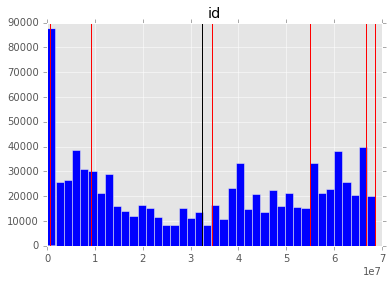

---------------------------
member_id: dtype=int64, 0 nulls, count vals=887379
       Min        2.5%         25%         50%         75%       97.5%         Max
  70473.00   835656.80  10877133.50  37095283.00  58471347.00  71332474.95  73544841.00


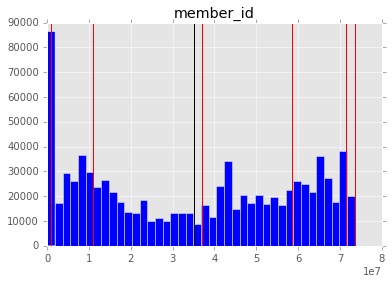

---------------------------
loan_amnt: dtype=float64, 0 nulls, count vals=1372
       Min        2.5%         25%         50%         75%       97.5%         Max
    500.00     2500.00     8000.00    13000.00    20000.00    35000.00    35000.00


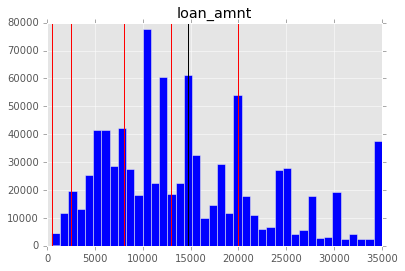

---------------------------
funded_amnt: dtype=float64, 0 nulls, count vals=1372
       Min        2.5%         25%         50%         75%       97.5%         Max
    500.00     2500.00     8000.00    13000.00    20000.00    35000.00    35000.00


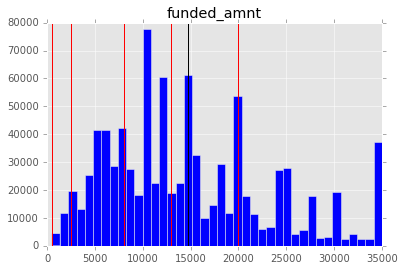

---------------------------
funded_amnt_inv: dtype=float64, 0 nulls, count vals=9856
       Min        2.5%         25%         50%         75%       97.5%         Max
      0.00     2500.00     8000.00    13000.00    20000.00    35000.00    35000.00


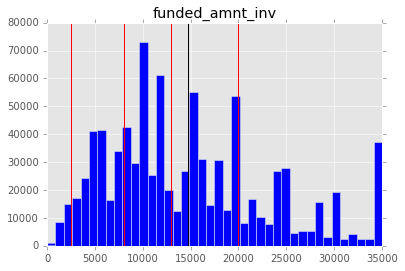

---------------------------
term: dtype=object, 0 nulls, count vals=2
 36 months    621125
 60 months    266254
Name: term, dtype: int64


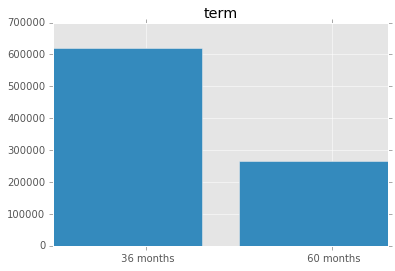

---------------------------
int_rate: dtype=float64, 0 nulls, count vals=542
       Min        2.5%         25%         50%         75%       97.5%         Max
      5.32        6.03        9.99       12.99       16.20       22.99       28.99


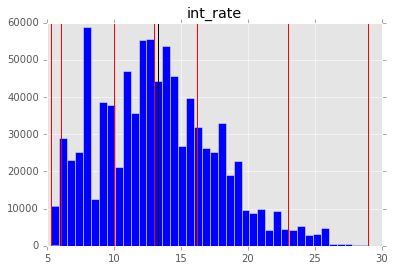

---------------------------
installment: dtype=float64, 0 nulls, count vals=68711
       Min        2.5%         25%         50%         75%       97.5%         Max
     15.67       87.39      260.70      382.55      572.60     1048.95     1445.46


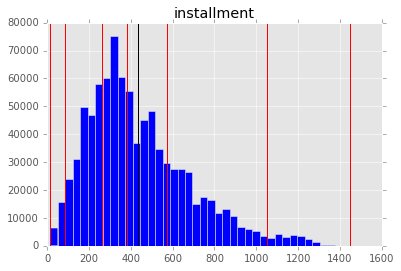

---------------------------
grade: dtype=object, 0 nulls, count vals=7
B    254535
C    245860
A    148202
D    139542
E     70705
F     23046
G      5489
Name: grade, dtype: int64


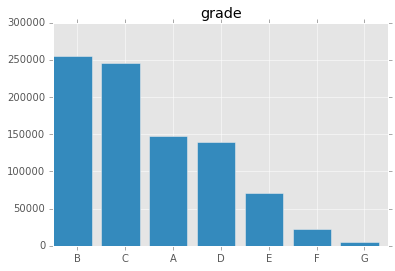

---------------------------
sub_grade: dtype=object, 0 nulls, count vals=35
B3    56323
B4    55626
C1    53387
C2    52236
C3    50161
C4    48857
B5    48833
B2    48781
B1    44972
A5    44816
C5    41219
D1    36238
A4    34531
D2    29803
D3    26554
D4    25558
A3    23457
A1    22913
A2    22485
D5    21389
Name: sub_grade, dtype: int64
Total number of distinct values: 35
B3         56323
B4         55626
C1         53387
C2         52236
C3         50161
C4         48857
B5         48833
B2         48781
B1         44972
A5         44816
C5         41219
D1         36238
A4         34531
D2         29803
D3         26554
D4         25558
A3         23457
A1         22913
A2         22485
Others    120629
dtype: int64


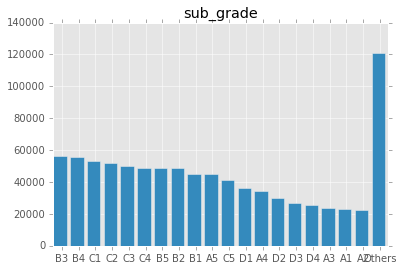

---------------------------
emp_title: dtype=object, 51457 nulls, count vals=299272
Teacher             13469
Manager             11240
Registered Nurse     5525
Owner                5376
RN                   5355
Supervisor           4983
Sales                4212
Project Manager      3988
Driver               3569
Office Manager       3510
General Manager      3178
Director             3156
manager              3138
teacher              2925
owner                2849
Engineer             2671
President            2598
driver               2429
Vice President       2351
Attorney             2136
Name: emp_title, dtype: int64
Total number of distinct values: 299272
Teacher              13469
Manager              11240
Registered Nurse      5525
Owner                 5376
RN                    5355
Supervisor            4983
Sales                 4212
Project Manager       3988
Driver                3569
Office Manager        3510
General Manager       3178
Director              3156
ma

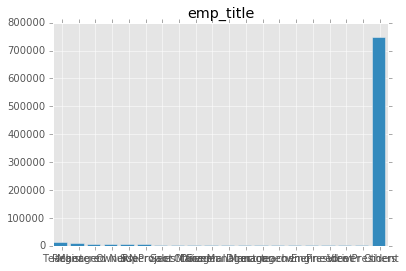

---------------------------
emp_length: dtype=object, 0 nulls, count vals=12
10+ years    291569
2 years       78870
< 1 year      70605
3 years       70026
1 year        57095
5 years       55704
4 years       52529
n/a           44825
7 years       44594
8 years       43955
6 years       42950
9 years       34657
Name: emp_length, dtype: int64


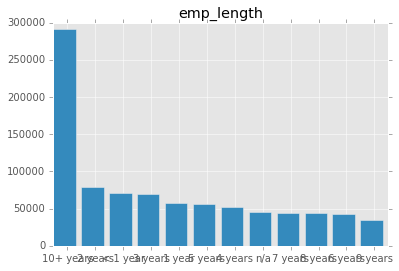

---------------------------
home_ownership: dtype=object, 0 nulls, count vals=6
MORTGAGE    443557
RENT        356117
OWN          87470
OTHER          182
NONE            50
ANY              3
Name: home_ownership, dtype: int64


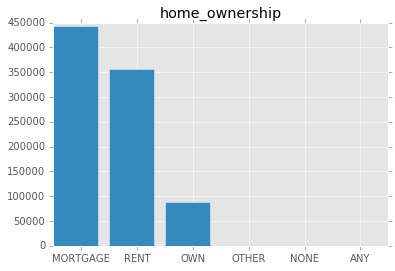

---------------------------
annual_inc: dtype=float64, 4 nulls, count vals=49384
       Min        2.5%         25%         50%         75%       97.5%         Max
      0.00    24000.00    45000.00    65000.00    90000.00   190000.00  9500000.00


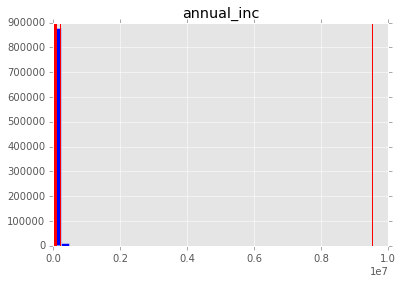

---------------------------
verification_status: dtype=object, 0 nulls, count vals=3
Source Verified    329558
Verified           291071
Not Verified       266750
Name: verification_status, dtype: int64


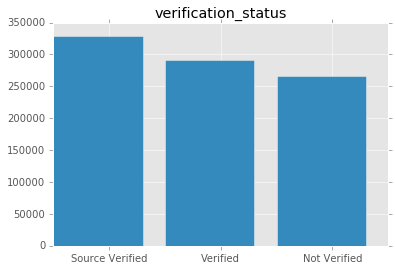

---------------------------
issue_d: dtype=object, 0 nulls, count vals=103
2015-10    48631
2015-07    45962
2015-12    44342
2014-10    38782
2015-11    37530
2015-08    35886
2015-04    35427
2015-01    35107
2015-05    31913
2014-07    29306
2015-09    28641
2015-06    28485
2015-03    25400
2014-11    25054
2015-02    23770
2014-05    19099
2014-04    19071
2014-08    18814
2014-06    17179
2014-03    16513
Name: issue_d, dtype: int64
Total number of distinct values: 103
2015-10     48631
2015-07     45962
2015-12     44342
2014-10     38782
2015-11     37530
2015-08     35886
2015-04     35427
2015-01     35107
2015-05     31913
2014-07     29306
2015-09     28641
2015-06     28485
2015-03     25400
2014-11     25054
2015-02     23770
2014-05     19099
2014-04     19071
2014-08     18814
2014-06     17179
Others     298980
dtype: int64


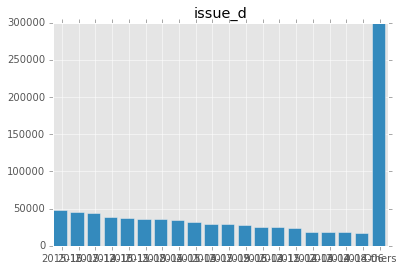

---------------------------
loan_status: dtype=object, 0 nulls, count vals=10
Current                                                601779
Fully Paid                                             207723
Charged Off                                             45248
Late (31-120 days)                                      11591
Issued                                                   8460
In Grace Period                                          6253
Late (16-30 days)                                        2357
Does not meet the credit policy. Status:Fully Paid       1988
Default                                                  1219
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64


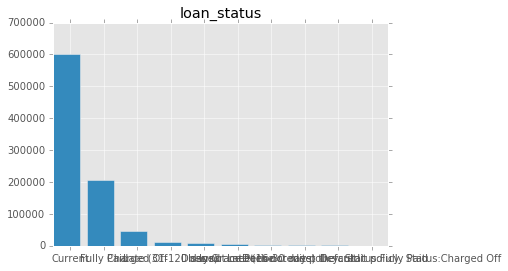

---------------------------
pymnt_plan: dtype=object, 0 nulls, count vals=2
n    887369
y        10
Name: pymnt_plan, dtype: int64


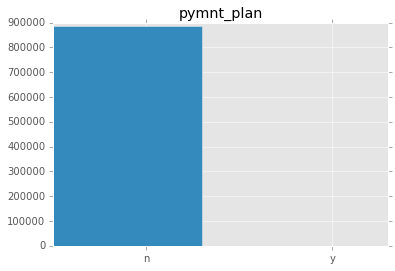

---------------------------
url: dtype=object, 0 nulls, count vals=887379
https://www.lendingclub.com/browse/loanDetail.action?loan_id=39370264    1
https://www.lendingclub.com/browse/loanDetail.action?loan_id=58912224    1
https://www.lendingclub.com/browse/loanDetail.action?loan_id=11235664    1
https://www.lendingclub.com/browse/loanDetail.action?loan_id=44096304    1
https://www.lendingclub.com/browse/loanDetail.action?loan_id=12425441    1
https://www.lendingclub.com/browse/loanDetail.action?loan_id=657563      1
https://www.lendingclub.com/browse/loanDetail.action?loan_id=15291174    1
https://www.lendingclub.com/browse/loanDetail.action?loan_id=49943332    1
https://www.lendingclub.com/browse/loanDetail.action?loan_id=2594900     1
https://www.lendingclub.com/browse/loanDetail.action?loan_id=49943330    1
https://www.lendingclub.com/browse/loanDetail.action?loan_id=62854634    1
https://www.lendingclub.com/browse/loanDetail.action?loan_id=62854637    1
https://www.lendingclub.co

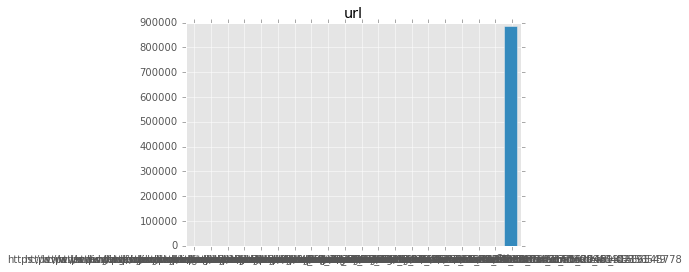

---------------------------
desc: dtype=object, 761350 nulls, count vals=124470
                                                         246
Debt Consolidation                                        13
  Borrower added on 03/17/14 > Debt consolidation<br>     11
  Borrower added on 03/10/14 > Debt consolidation<br>     10
  Borrower added on 02/19/14 > Debt consolidation<br>      9
  Borrower added on 01/29/14 > Debt consolidation<br>      8
Camping Membership                                         8
  Borrower added on 01/15/14 > Debt consolidation<br>      7
  Borrower added on 01/22/14 > Debt consolidation<br>      7
  Borrower added on 02/03/14 > Debt consolidation<br>      6
  Borrower added on 03/07/14 > Debt consolidation<br>      6
  Borrower added on 01/27/14 > Debt consolidation<br>      6
  Borrower added on 01/14/13 > Debt consolidation<br>      6
  Borrower added on 03/03/14 > Debt consolidation<br>      6
  Borrower added on 03/18/14 > Debt consolidation<br>      6
  Bor

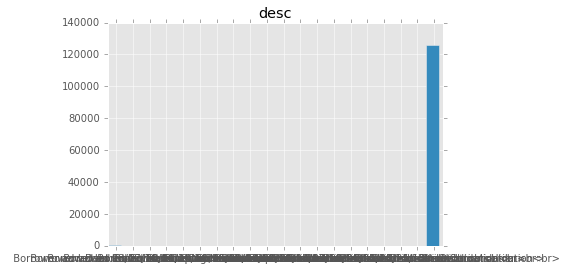

---------------------------
purpose: dtype=object, 0 nulls, count vals=14
debt_consolidation    524215
credit_card           206182
home_improvement       51829
other                  42894
major_purchase         17277
small_business         10377
car                     8863
medical                 8540
moving                  5414
vacation                4736
house                   3707
wedding                 2347
renewable_energy         575
educational              423
Name: purpose, dtype: int64


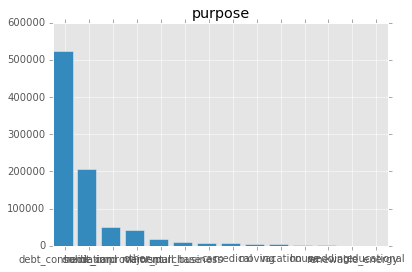

---------------------------
title: dtype=object, 151 nulls, count vals=63145
Debt consolidation           414001
Credit card refinancing      164331
Home improvement              40112
Other                         31892
Debt Consolidation            15760
Major purchase                12051
Business                       6728
Medical expenses               6674
Car financing                  5565
Consolidation                  5381
debt consolidation             4834
Moving and relocation          3921
Vacation                       3805
Debt Consolidation Loan        3804
Home buying                    2365
Credit Card Consolidation      2359
consolidation                  2174
Personal Loan                  2133
Consolidation Loan             1778
Home Improvement               1772
Name: title, dtype: int64
Total number of distinct values: 63145
Debt consolidation           414001
Credit card refinancing      164331
Home improvement              40112
Other                         

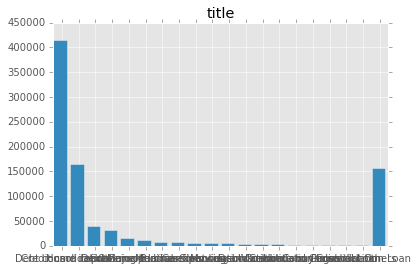

---------------------------
zip_code: dtype=object, 0 nulls, count vals=935
945xx    9770
750xx    9417
112xx    9272
606xx    8641
300xx    8126
100xx    7609
070xx    7431
331xx    7416
900xx    7287
770xx    6938
891xx    6441
917xx    6357
330xx    6283
117xx    6129
104xx    6008
921xx    5661
852xx    5442
926xx    5415
913xx    5160
925xx    4907
Name: zip_code, dtype: int64
Total number of distinct values: 935
945xx       9770
750xx       9417
112xx       9272
606xx       8641
300xx       8126
100xx       7609
070xx       7431
331xx       7416
900xx       7287
770xx       6938
891xx       6441
917xx       6357
330xx       6283
117xx       6129
104xx       6008
921xx       5661
852xx       5442
926xx       5415
913xx       5160
Others    752576
dtype: int64


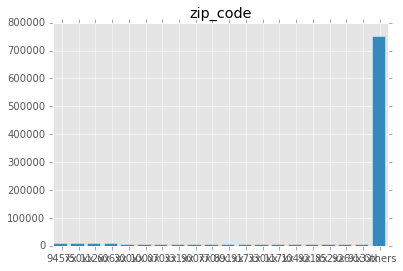

---------------------------
addr_state: dtype=object, 0 nulls, count vals=51
CA    129517
NY     74086
TX     71138
FL     60935
IL     35476
NJ     33256
PA     31393
OH     29631
GA     29085
VA     26255
NC     24720
MI     22985
MD     21031
MA     20593
AZ     20412
WA     19434
CO     18807
MN     15957
MO     14207
IN     13789
Name: addr_state, dtype: int64
Total number of distinct values: 51
CA        129517
NY         74086
TX         71138
FL         60935
IL         35476
NJ         33256
PA         31393
OH         29631
GA         29085
VA         26255
NC         24720
MI         22985
MD         21031
MA         20593
AZ         20412
WA         19434
CO         18807
MN         15957
MO         14207
Others    188461
dtype: int64


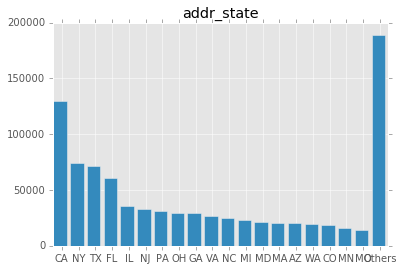

---------------------------
dti: dtype=float64, 0 nulls, count vals=4086
       Min        2.5%         25%         50%         75%       97.5%         Max
      0.00        3.53       11.91       17.65       23.95       34.81     9999.00


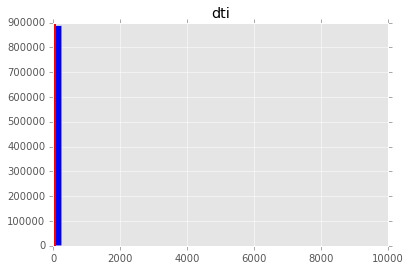

---------------------------
delinq_2yrs: dtype=float64, 29 nulls, count vals=29
       Min        2.5%         25%         50%         75%       97.5%         Max
      0.00        0.00        0.00        0.00        0.00        3.00       39.00


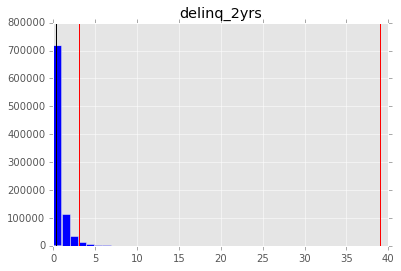

---------------------------
earliest_cr_line: dtype=object, 29 nulls, count vals=697
2001-08    6659
2000-08    6529
2000-10    6322
2001-10    6154
2002-08    6086
2000-09    5918
1999-11    5878
1999-10    5824
2000-11    5822
2002-09    5812
2002-10    5684
2001-09    5678
2003-09    5612
1999-08    5598
1999-09    5588
2001-07    5330
2001-11    5223
2003-10    5212
2003-08    5205
2001-03    5173
Name: earliest_cr_line, dtype: int64
Total number of distinct values: 697
2001-08      6659
2000-08      6529
2000-10      6322
2001-10      6154
2002-08      6086
2000-09      5918
1999-11      5878
1999-10      5824
2000-11      5822
2002-09      5812
2002-10      5684
2001-09      5678
2003-09      5612
1999-08      5598
1999-09      5588
2001-07      5330
2001-11      5223
2003-10      5212
2003-08      5205
Others     777216
dtype: int64


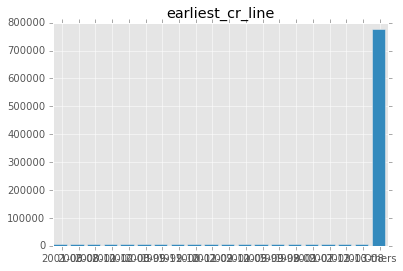

---------------------------
inq_last_6mths: dtype=float64, 29 nulls, count vals=28
       Min        2.5%         25%         50%         75%       97.5%         Max
      0.00        0.00        0.00        0.00        1.00        3.00       33.00


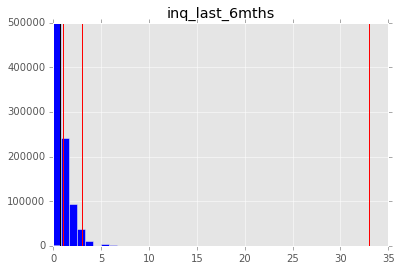

---------------------------
mths_since_last_delinq: dtype=float64, 454312 nulls, count vals=155
       Min        2.5%         25%         50%         75%       97.5%         Max
      0.00        3.00       15.00       31.00       50.00       78.00      188.00


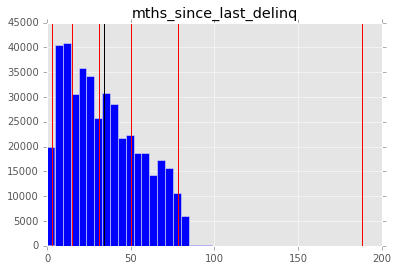

---------------------------
mths_since_last_record: dtype=float64, 750326 nulls, count vals=123
       Min        2.5%         25%         50%         75%       97.5%         Max
      0.00       12.00       51.00       70.00       92.00      117.00      129.00


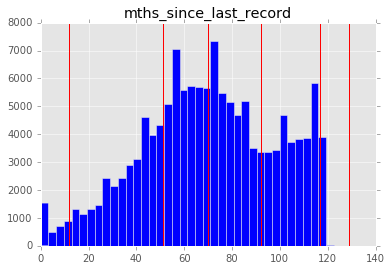

---------------------------
open_acc: dtype=float64, 29 nulls, count vals=77
       Min        2.5%         25%         50%         75%       97.5%         Max
      0.00        4.00        8.00       11.00       14.00       24.00       90.00


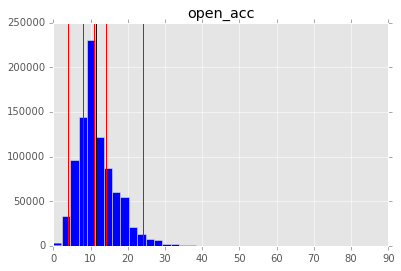

---------------------------
pub_rec: dtype=float64, 29 nulls, count vals=32
       Min        2.5%         25%         50%         75%       97.5%         Max
      0.00        0.00        0.00        0.00        0.00        2.00       86.00


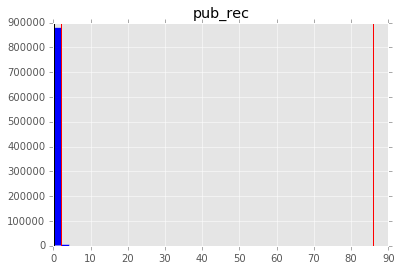

---------------------------
revol_bal: dtype=float64, 0 nulls, count vals=73740
       Min        2.5%         25%         50%         75%       97.5%         Max
      0.00     1078.00     6443.00    11875.00    20829.00    58238.55  2904836.00


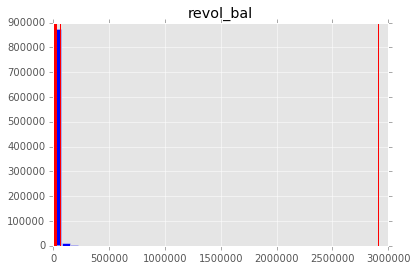

---------------------------
revol_util: dtype=float64, 502 nulls, count vals=1356
       Min        2.5%         25%         50%         75%       97.5%         Max
      0.00        7.60       37.70       56.00       73.60       95.90      892.30


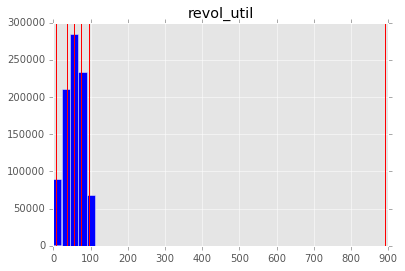

---------------------------
total_acc: dtype=float64, 29 nulls, count vals=135
       Min        2.5%         25%         50%         75%       97.5%         Max
      1.00        7.00       17.00       24.00       32.00       53.00      169.00


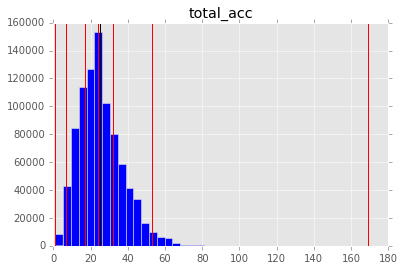

---------------------------
initial_list_status: dtype=object, 0 nulls, count vals=2
f    456848
w    430531
Name: initial_list_status, dtype: int64


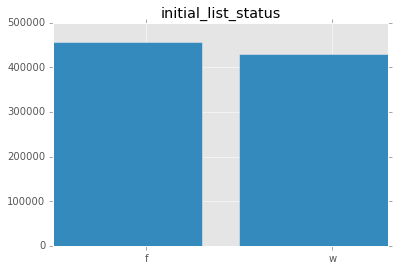

---------------------------
out_prncp: dtype=float64, 0 nulls, count vals=248332
       Min        2.5%         25%         50%         75%       97.5%         Max
      0.00        0.00        0.00     6458.29    13659.06    29191.50    49372.86


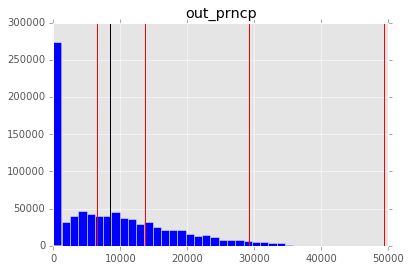

---------------------------
out_prncp_inv: dtype=float64, 0 nulls, count vals=266244
       Min        2.5%         25%         50%         75%       97.5%         Max
      0.00        0.00        0.00     6455.81    13654.05    29177.04    49372.86


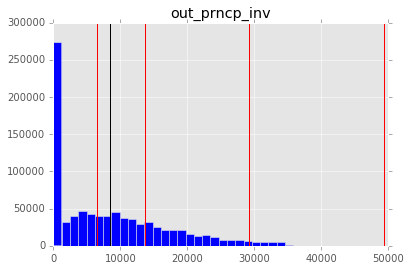

---------------------------
total_pymnt: dtype=float64, 0 nulls, count vals=506726
       Min        2.5%         25%         50%         75%       97.5%         Max
      0.00      150.93     1914.59     4895.00    10616.81    29578.05    57777.58


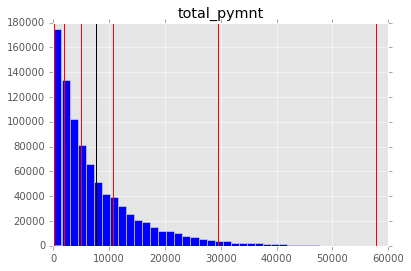

---------------------------
total_pymnt_inv: dtype=float64, 0 nulls, count vals=506616
       Min        2.5%         25%         50%         75%       97.5%         Max
      0.00      143.39     1899.70     4862.01    10565.69    29476.46    57777.58


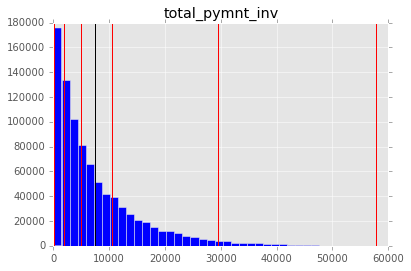

---------------------------
total_rec_prncp: dtype=float64, 0 nulls, count vals=260227
       Min        2.5%         25%         50%         75%       97.5%         Max
      0.00       96.95     1200.57     3215.32     8000.00    25000.00    35000.03


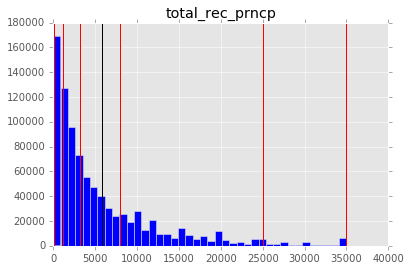

---------------------------
total_rec_int: dtype=float64, 0 nulls, count vals=324635
       Min        2.5%         25%         50%         75%       97.5%         Max
      0.00       26.80      441.46     1073.28     2238.27     7786.39    24205.62


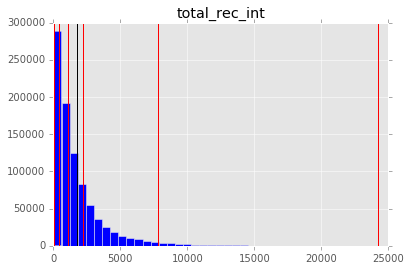

---------------------------
total_rec_late_fee: dtype=float64, 0 nulls, count vals=6181
       Min        2.5%         25%         50%         75%       97.5%         Max
      0.00        0.00        0.00        0.00        0.00        0.00      358.68


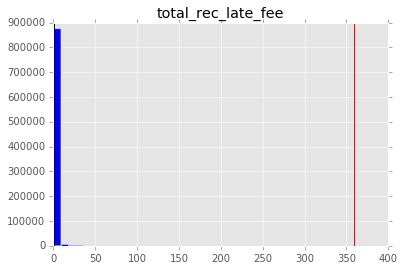

---------------------------
recoveries: dtype=float64, 0 nulls, count vals=23055
       Min        2.5%         25%         50%         75%       97.5%         Max
      0.00        0.00        0.00        0.00        0.00      125.36    33520.27


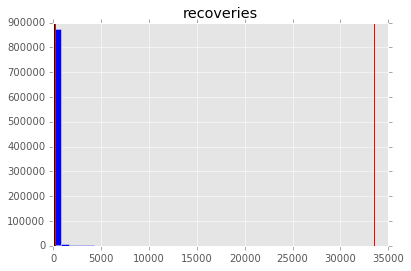

---------------------------
collection_recovery_fee: dtype=float64, 0 nulls, count vals=20708
       Min        2.5%         25%         50%         75%       97.5%         Max
      0.00        0.00        0.00        0.00        0.00        1.99     7002.19


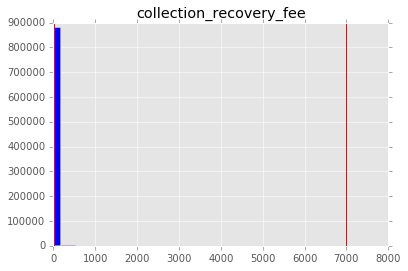

---------------------------
last_pymnt_d: dtype=object, 17659 nulls, count vals=98
2016-01    470150
2015-12    150861
2015-10     16000
2015-07     14483
2015-11     13981
2015-09     13834
2015-08     13040
2015-06     11983
2015-04     11107
2015-05     11069
2015-03     10760
2015-02      8849
2015-01      8658
2014-10      7676
2014-12      7253
2014-09      6316
2014-07      6312
2014-08      6305
2014-11      6206
2014-06      5620
Name: last_pymnt_d, dtype: int64
Total number of distinct values: 98
2016-01    470150
2015-12    150861
2015-10     16000
2015-07     14483
2015-11     13981
2015-09     13834
2015-08     13040
2015-06     11983
2015-04     11107
2015-05     11069
2015-03     10760
2015-02      8849
2015-01      8658
2014-10      7676
2014-12      7253
2014-09      6316
2014-07      6312
2014-08      6305
2014-11      6206
Others      74877
dtype: int64


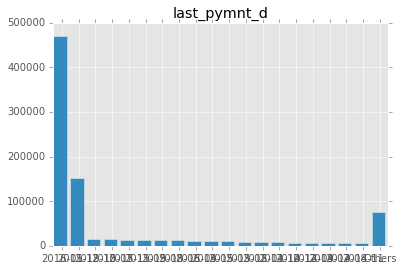

---------------------------
last_pymnt_amnt: dtype=float64, 0 nulls, count vals=232451
       Min        2.5%         25%         50%         75%       97.5%         Max
      0.00       32.40      280.17      462.78      831.25    18079.83    36475.59


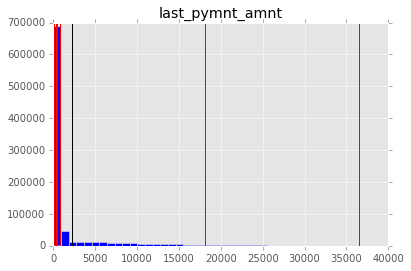

---------------------------
next_pymnt_d: dtype=object, 252971 nulls, count vals=100
2016-02    553406
2016-01     78195
2011-03       107
2011-04       101
2011-02        91
2011-01        79
2011-05        77
2010-12        71
2016-03        68
2011-06        66
2011-09        63
2011-08        57
2010-11        55
2010-08        54
2011-07        53
2009-10        53
2009-12        53
2010-09        53
2009-11        52
2008-12        51
Name: next_pymnt_d, dtype: int64
Total number of distinct values: 100
2016-02    553406
2016-01     78195
2011-03       107
2011-04       101
2011-02        91
2011-01        79
2011-05        77
2010-12        71
2016-03        68
2011-06        66
2011-09        63
2011-08        57
2010-11        55
2010-08        54
2011-07        53
2009-10        53
2009-12        53
2010-09        53
2009-11        52
Others       1654
dtype: int64


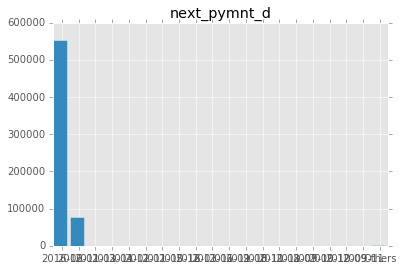

---------------------------
last_credit_pull_d: dtype=object, 53 nulls, count vals=103
2016-01    730574
2015-12     19308
2015-11     11490
2015-10     10419
2015-09     10087
2015-07      8642
2015-08      7987
2015-06      7130
2015-04      6160
2015-05      5930
2015-03      5775
2015-01      5271
2015-02      5017
2014-12      3702
2014-10      3358
2014-11      3168
2014-09      2961
2014-08      2812
2014-07      2773
2014-05      2290
Name: last_credit_pull_d, dtype: int64
Total number of distinct values: 103
2016-01    730574
2015-12     19308
2015-11     11490
2015-10     10419
2015-09     10087
2015-07      8642
2015-08      7987
2015-06      7130
2015-04      6160
2015-05      5930
2015-03      5775
2015-01      5271
2015-02      5017
2014-12      3702
2014-10      3358
2014-11      3168
2014-09      2961
2014-08      2812
2014-07      2773
Others      34762
dtype: int64


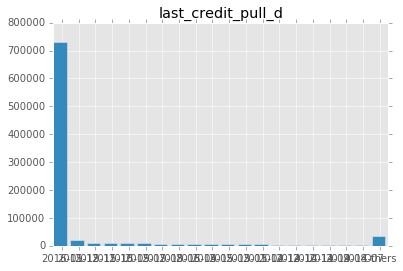

---------------------------
collections_12_mths_ex_med: dtype=float64, 145 nulls, count vals=12
0.0     875553
1.0      10824
2.0        732
3.0         88
4.0         23
5.0          7
6.0          2
20.0         1
16.0         1
14.0         1
10.0         1
7.0          1
Name: collections_12_mths_ex_med, dtype: int64


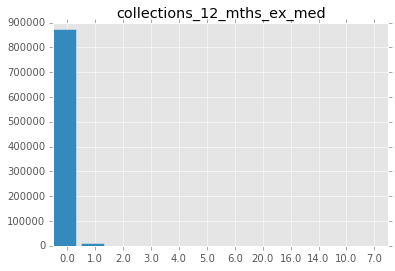

---------------------------
mths_since_last_major_derog: dtype=float64, 665676 nulls, count vals=168
       Min        2.5%         25%         50%         75%       97.5%         Max
      0.00        6.00       27.00       44.00       61.00       81.00      188.00


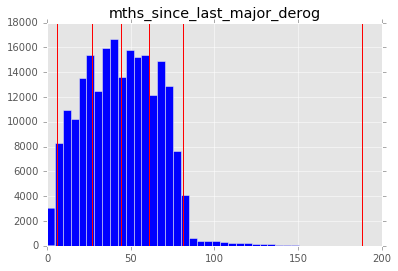

---------------------------
policy_code: dtype=float64, 0 nulls, count vals=1
1.0    887379
Name: policy_code, dtype: int64


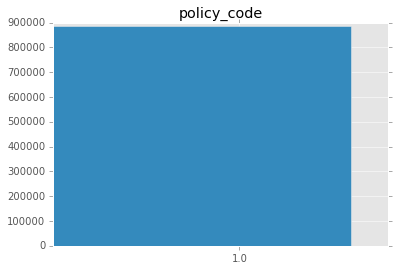

---------------------------
application_type: dtype=object, 0 nulls, count vals=2
INDIVIDUAL    886868
JOINT            511
Name: application_type, dtype: int64


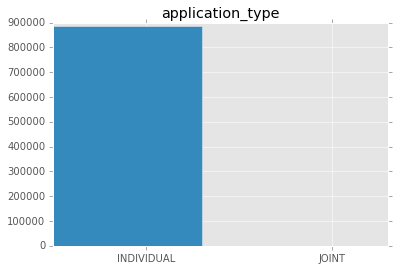

---------------------------
annual_inc_joint: dtype=float64, 886868 nulls, count vals=308
       Min        2.5%         25%         50%         75%       97.5%         Max
  17950.00    40866.00    76032.50   101771.00   132800.00   216500.00   500000.00


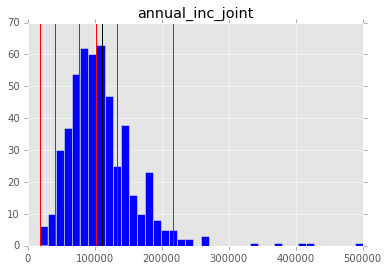

---------------------------
dti_joint: dtype=float64, 886870 nulls, count vals=449
       Min        2.5%         25%         50%         75%       97.5%         Max
      3.00        6.29       13.20       17.61       22.65       33.11       43.86


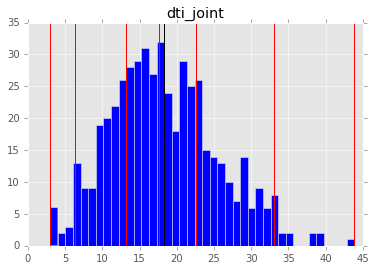

---------------------------
verification_status_joint: dtype=object, 886868 nulls, count vals=3
Not Verified       283
Verified           167
Source Verified     61
Name: verification_status_joint, dtype: int64


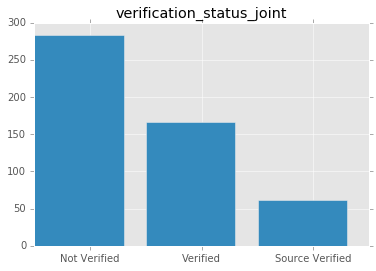

---------------------------
acc_now_delinq: dtype=float64, 29 nulls, count vals=8
0.0     883236
1.0       3866
2.0        208
3.0         28
4.0          7
5.0          3
14.0         1
6.0          1
Name: acc_now_delinq, dtype: int64


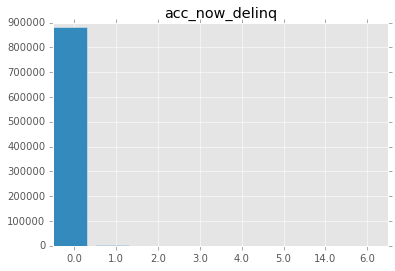

---------------------------
tot_coll_amt: dtype=float64, 70276 nulls, count vals=10325
       Min        2.5%         25%         50%         75%       97.5%         Max
      0.00        0.00        0.00        0.00        0.00     1604.00  9152545.00


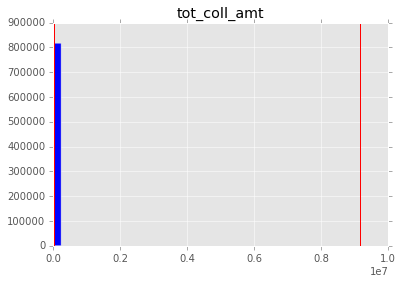

---------------------------
tot_cur_bal: dtype=float64, 70276 nulls, count vals=327342
       Min        2.5%         25%         50%         75%       97.5%         Max
      0.00     6002.55    29853.00    80559.00   208205.00   517577.45  8000078.00


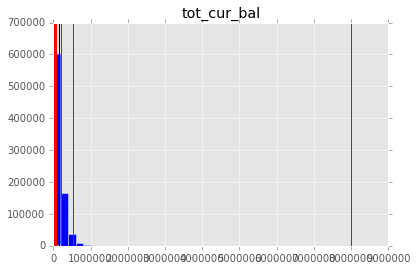

---------------------------
open_acc_6m: dtype=float64, 866007 nulls, count vals=13
0.0     8246
1.0     6808
2.0     3752
3.0     1572
4.0      593
5.0      232
6.0      104
7.0       37
8.0       13
9.0        7
10.0       4
14.0       2
12.0       2
Name: open_acc_6m, dtype: int64


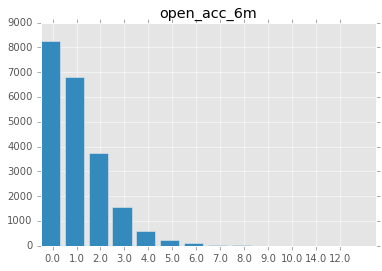

---------------------------
open_il_6m: dtype=float64, 866007 nulls, count vals=35
       Min        2.5%         25%         50%         75%       97.5%         Max
      0.00        0.00        1.00        2.00        4.00       12.00       40.00


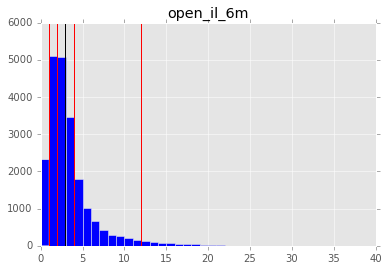

---------------------------
open_il_12m: dtype=float64, 866007 nulls, count vals=12
0.0     10806
1.0      6655
2.0      2785
3.0       727
4.0       235
5.0        96
6.0        46
7.0        11
8.0         5
9.0         3
10.0        2
12.0        1
Name: open_il_12m, dtype: int64


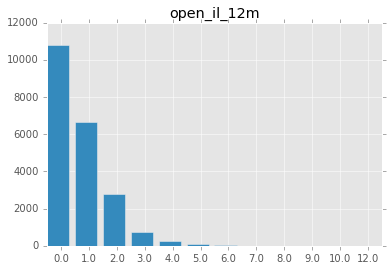

---------------------------
open_il_24m: dtype=float64, 866007 nulls, count vals=17
1.0     6436
0.0     5481
2.0     4448
3.0     2468
4.0     1249
5.0      606
6.0      309
7.0      163
8.0       81
9.0       47
10.0      28
11.0      23
12.0      17
13.0       7
14.0       6
15.0       2
19.0       1
Name: open_il_24m, dtype: int64


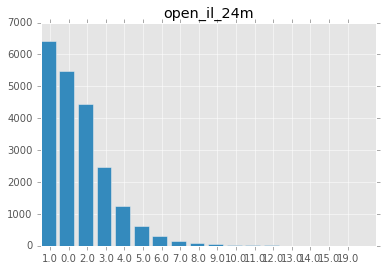

---------------------------
mths_since_rcnt_il: dtype=float64, 866569 nulls, count vals=201
       Min        2.5%         25%         50%         75%       97.5%         Max
      0.00        1.00        6.00       12.00       23.00      109.00      363.00


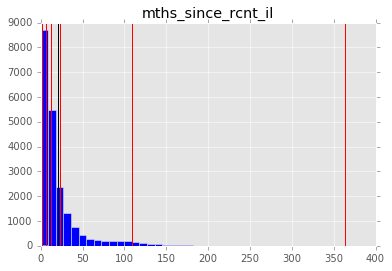

---------------------------
total_bal_il: dtype=float64, 866007 nulls, count vals=17030
       Min        2.5%         25%         50%         75%       97.5%         Max
      0.00        0.00    10251.50    24684.50    47858.00   151905.75   878459.00


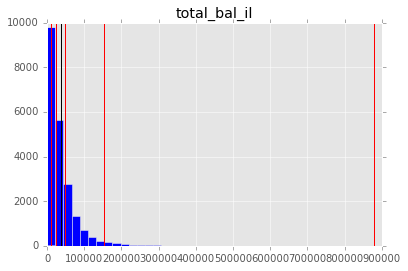

---------------------------
il_util: dtype=float64, 868762 nulls, count vals=1272
       Min        2.5%         25%         50%         75%       97.5%         Max
      0.00       16.10       58.60       74.90       87.60      108.06      223.30


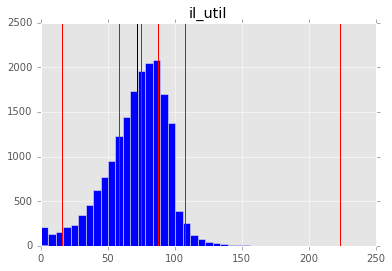

---------------------------
open_rv_12m: dtype=float64, 866007 nulls, count vals=18
0.0     7073
1.0     6415
2.0     3955
3.0     2125
4.0      962
5.0      420
6.0      204
7.0      103
8.0       50
10.0      24
9.0       21
12.0       7
11.0       6
14.0       2
15.0       2
19.0       1
16.0       1
22.0       1
Name: open_rv_12m, dtype: int64


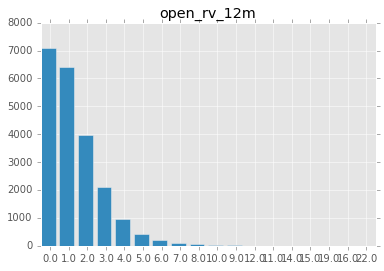

---------------------------
open_rv_24m: dtype=float64, 866007 nulls, count vals=28
       Min        2.5%         25%         50%         75%       97.5%         Max
      0.00        0.00        1.00        2.00        4.00        9.00       43.00


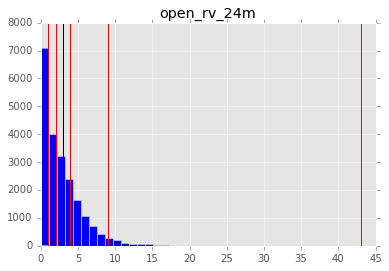

---------------------------
max_bal_bc: dtype=float64, 866007 nulls, count vals=10707
       Min        2.5%         25%         50%         75%       97.5%         Max
      0.00       71.10     2411.00     4483.00     7771.50    19654.90   127305.00


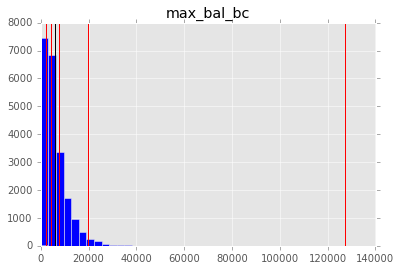

---------------------------
all_util: dtype=float64, 866007 nulls, count vals=1128
       Min        2.5%         25%         50%         75%       97.5%         Max
      0.00       18.80       47.70       61.90       75.20       96.00      151.40


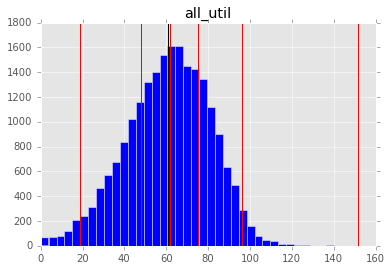

---------------------------
total_rev_hi_lim: dtype=float64, 70276 nulls, count vals=21251
       Min        2.5%         25%         50%         75%       97.5%         Max
      0.00     4500.00    13900.00    23700.00    39800.00   107900.00  9999999.00


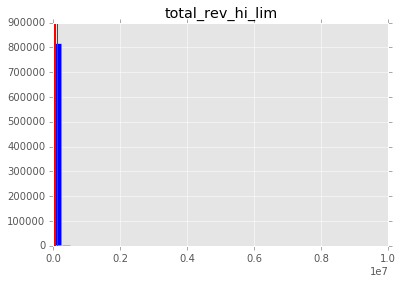

---------------------------
inq_fi: dtype=float64, 866007 nulls, count vals=18
0.0     11411
1.0      5009
2.0      2530
3.0      1119
4.0       589
5.0       354
6.0       165
7.0        91
8.0        42
9.0        23
10.0       13
11.0       11
12.0        5
13.0        5
14.0        2
16.0        1
15.0        1
17.0        1
Name: inq_fi, dtype: int64


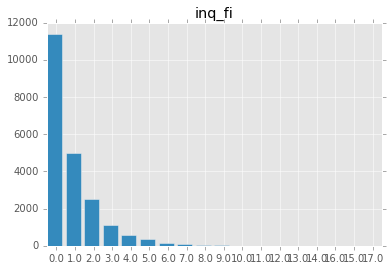

---------------------------
total_cu_tl: dtype=float64, 866007 nulls, count vals=33
       Min        2.5%         25%         50%         75%       97.5%         Max
      0.00        0.00        0.00        0.00        2.00        9.00       35.00


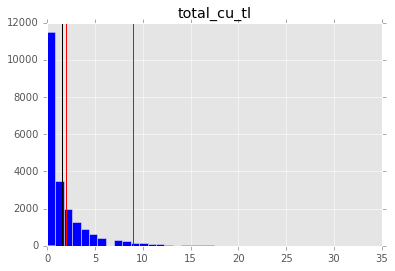

---------------------------
inq_last_12m: dtype=float64, 866007 nulls, count vals=29
       Min        2.5%         25%         50%         75%       97.5%         Max
     -4.00       -4.00        0.00        2.00        3.00        9.00       32.00


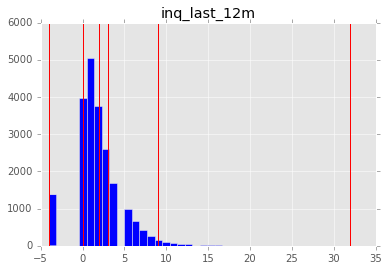

In [16]:
for column in raw_lc_data.columns:
    explore_column(raw_lc_data, column)

TODO on the data exploration:

* Parse dates (done)
* Fix fields that throw exception when plotting (e.g., dates) (done)
* Show min/max as well as quantiles (done)
* Treat dates as special and make subplots per year (or turn histograms into line charts accompanied by boxplots per year)
* Graphically show distribution of categorical values (done)
* Hand-coded ranking/combining of categorical values
* Cutoff should be > 10 (done)
* Color-code by outcome
* Identify missing values
* qq plots against likely inputs

In [ ]:
vcounts = raw_lc_data['loan_status'].value_counts()
vcounts.index

In [ ]:
plt.bar(range(len(vcounts)), vcounts)
plt.gca().set_xticks(range(len(vcounts)))
plt.gca().set_xticklabels(vcounts.index)
plt.show()

In [ ]:
print vcounts[0:5].append(pd.Series(vcounts[5:].sum(), index=['Others']))

In [12]:
tuple([1, 2, 3])

(1, 2, 3)